# Melbourne Housing Market

https://www.kaggle.com/anthonypino/melbourne-housing-market/data

In [6]:
# Dataset
import sklearn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

full_data = pd.read_csv("./Melbourne_housing_FULL.csv.zip")

print(full_data.shape)
print(full_data.columns)

(29217, 21)
Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [7]:
full_data.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


След като успешно заредихме данните, нека преминем към тяхното изследване.

Първо ще проверим дали всички клетки в таблицата имат стойности.

In [8]:
full_data.isnull().sum().sort_values()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
CouncilArea          2
Propertycount        2
Regionname           2
Lattitude         6339
Longtitude        6339
Price             6367
Bedroom2          6552
Bathroom          6558
Car               6860
Landsize          9568
YearBuilt        15744
BuildingArea     17400
dtype: int64

Да видим малко статистика:

In [9]:
full_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,29217.000000,2.285000e+04,29217.000000,29217.000000,22665.000000,22659.000000,22357.000000,19649.000000,11817.000000,13473.000000,22878.000000,22878.000000,29215.000000
mean,3.013451,1.056543e+06,10.826519,3113.517952,3.029605,1.601174,1.682784,581.161382,157.422735,1964.937876,-37.812002,145.001545,7535.831936
std,0.975952,6.466137e+05,6.501154,102.778677,0.996666,0.721436,0.995973,3591.192385,427.686929,37.421665,0.085665,0.114382,4421.509141
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.185600,144.423790,83.000000
25%,2.000000,6.370000e+05,6.300000,3049.000000,2.000000,1.000000,1.000000,200.000000,99.000000,1940.000000,-37.861300,144.936700,4380.000000
50%,3.000000,8.800000e+05,10.100000,3103.000000,3.000000,1.000000,2.000000,486.000000,132.000000,1970.000000,-37.808800,145.006400,6567.000000
75%,4.000000,1.300000e+06,13.800000,3152.000000,4.000000,2.000000,2.000000,665.000000,184.000000,2000.000000,-37.757393,145.068630,10331.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.395100,145.526350,21650.000000


Нека рагледаме и какви са типовете данни.

In [10]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29217 entries, 0 to 29216
Data columns (total 21 columns):
Suburb           29217 non-null object
Address          29217 non-null object
Rooms            29217 non-null int64
Type             29217 non-null object
Price            22850 non-null float64
Method           29217 non-null object
SellerG          29217 non-null object
Date             29217 non-null object
Distance         29217 non-null float64
Postcode         29217 non-null int64
Bedroom2         22665 non-null float64
Bathroom         22659 non-null float64
Car              22357 non-null float64
Landsize         19649 non-null float64
BuildingArea     11817 non-null float64
YearBuilt        13473 non-null float64
CouncilArea      29215 non-null object
Lattitude        22878 non-null float64
Longtitude       22878 non-null float64
Regionname       29215 non-null object
Propertycount    29215 non-null float64
dtypes: float64(11), int64(2), object(8)
memory usage: 4.7+ MB


Да разгледаме и малко графики.

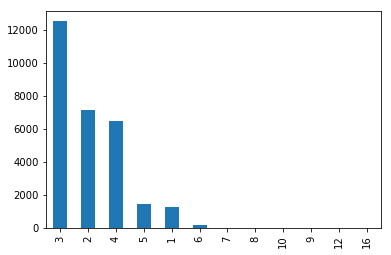

In [11]:
full_data.Rooms.value_counts().plot(kind='bar')

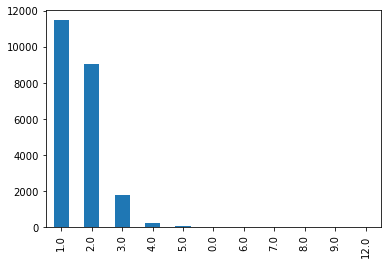

In [12]:
full_data.Bathroom.value_counts().plot(kind='bar')

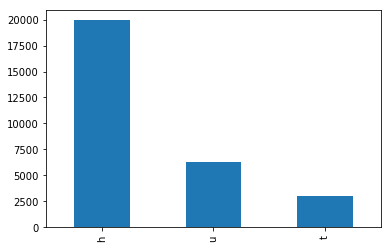

In [56]:
full_data.Type.value_counts().plot(kind='bar')

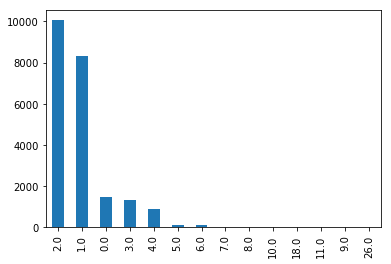

In [57]:
full_data.Car.value_counts().plot(kind='bar')

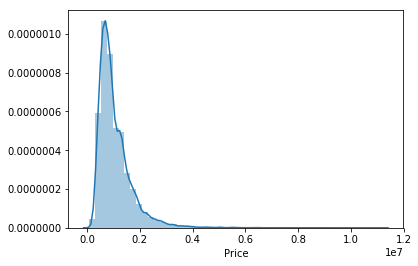

In [58]:
sns.distplot(full_data.Price.dropna());

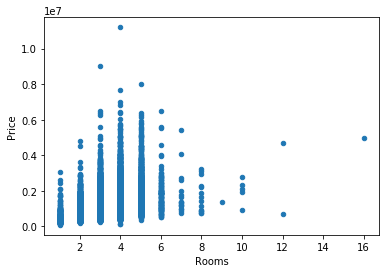

In [59]:
full_data.plot.scatter(x = 'Rooms', y = 'Price')

Ще започнем с baseline модел, който да предсказва цената.

Първо трябва да разделим данните на x_train, y_train и x_test и y_test за да проверим дали моделът генерализира.

In [107]:
from sklearn.model_selection import train_test_split

train_data = full_data[~full_data.Price.isnull()]

train_no_sale_price = train_data.drop(labels=['Price'], axis=1)
train_sale_price = train_data['Price']

x_train, x_test, y_train, y_test = train_test_split(train_no_sale_price, 
                                                    train_sale_price, 
                                                    test_size=0.3, 
                                                    random_state=4330)

In [108]:
for df in [x_train, x_test, y_train, y_test]:
    print(df.shape)


(15995, 20)
(6855, 20)
(15995,)
(6855,)


Нека пробваме линейна регресия:

In [109]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

ValueError: could not convert string to float: 'Eastern Metropolitan'

In [110]:
print((x_train.values == 'Eastern Metropolitan').sum())

col_idx = pd.np.argmax(x_train.values == 'Eastern Metropolitan', axis=1).max()

x_train.iloc[:, col_idx].value_counts()

1855


Southern Metropolitan         5209
Northern Metropolitan         4592
Western Metropolitan          3398
Eastern Metropolitan          1855
South-Eastern Metropolitan     736
Eastern Victoria                90
Northern Victoria               67
Western Victoria                46
Name: Regionname, dtype: int64

Модела не може да работи с текст :(, нека игнорираме всички колони съдържащи текст.

In [111]:
numeric_column_names = x_train.describe().columns
print(numeric_column_names)

Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')


In [112]:
regressor.fit(x_train[numeric_column_names], y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [113]:
x_train[numeric_column_names].isnull().sum().sort_values()

Rooms               0
Distance            0
Postcode            0
Propertycount       2
Lattitude        3455
Longtitude       3455
Bedroom2         3570
Bathroom         3574
Car              3738
Landsize         5253
YearBuilt        8634
BuildingArea     9563
dtype: int64

In [114]:
x_train[numeric_column_names] = x_train[numeric_column_names].fillna(0)
x_test[numeric_column_names] = x_test[numeric_column_names].fillna(0)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [115]:
regressor.fit(x_train[numeric_column_names], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [116]:
regressor.score(x_train[numeric_column_names], y_train)

0.44036939090029775

Някакво число. При максимум 1 - е доста зле.

Нека да видим как са разпределени предвижданията:

[  822732.69186779  1320170.45033315   943193.70872054   729869.415285
   741971.15864624  1110754.29711288   192394.19877819  1300617.89577449]


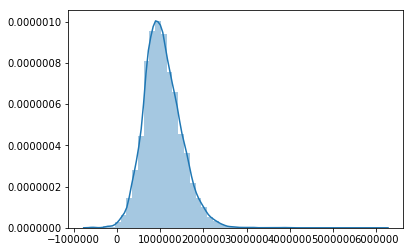

In [117]:
predictions = regressor.predict(x_train[numeric_column_names])

print(predictions[:8])

sns.distplot(predictions);

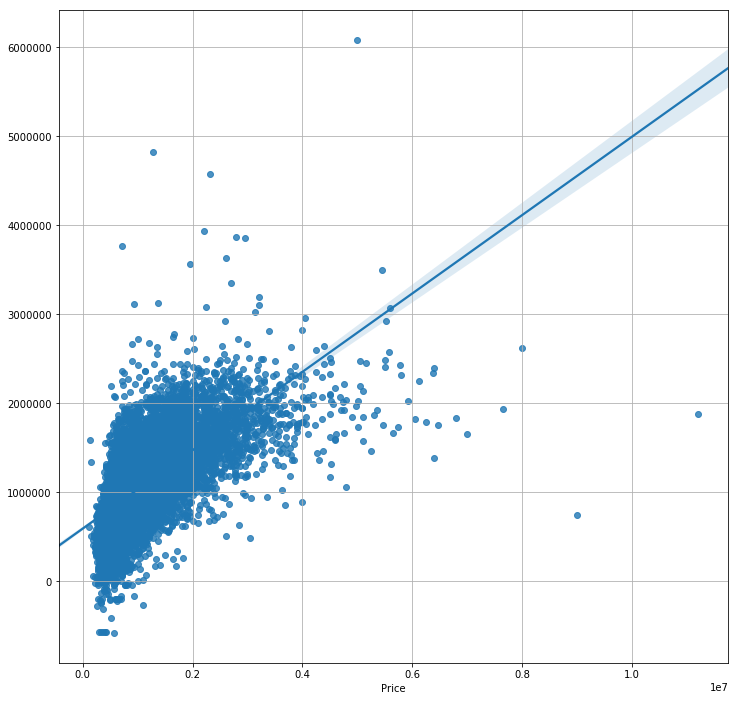

In [118]:
plt.figure(figsize=(12,12))
sns.regplot(y_train, predictions)
plt.grid(True)
plt.show()

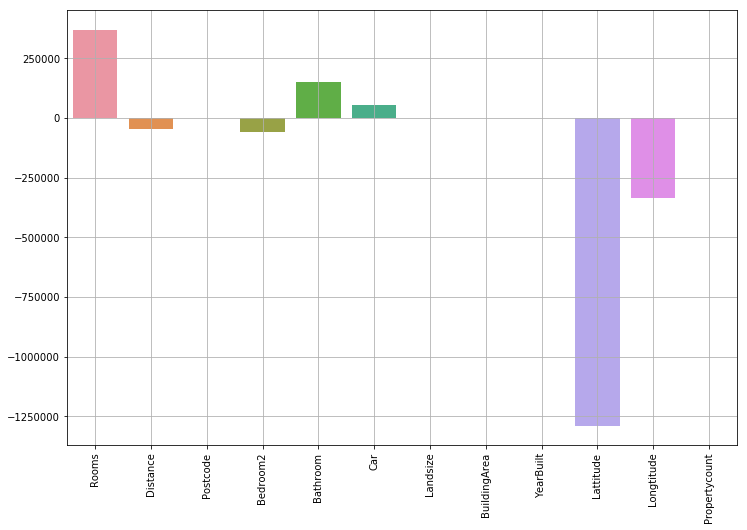

In [119]:
plt.figure(figsize=(12,8))
barplot = sns.barplot(x=numeric_column_names, y=regressor.coef_, orient='vertical')
plt.setp(barplot.get_xticklabels(), rotation=90); plt.grid(True);

Нека да пробваме без Lattitude и Longtitude, тъй като модел им придава голямо значение.

numeric_column_names_2 = list(set(numeric_column_names) - set(['Lattitude', 'Longtitude']))

regressor_2 = LinearRegression()
regressor_2.fit(x_train[numeric_column_names_2], y_train)
regressor_2.score(x_train[numeric_column_names_2], y_train)

Нещата се влошиха :(

Да се пробваме да разделим датасета по типове и да тренираме отделен регресор за всеки тип.

In [120]:
train_data_h = train_data[train_data['Type'] == 'h']

train_no_sale_price_h = train_data_h.drop(labels=['Price'], axis=1)
train_sale_price_h = train_data_h['Price']

x_train_h, x_test_h, y_train_h, y_test_h = train_test_split(train_no_sale_price_h, 
                                                    train_sale_price_h, 
                                                    test_size=0.3, 
                                                    random_state=4330)

In [121]:
x_train_h[numeric_column_names] = x_train_h[numeric_column_names].fillna(0)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [122]:
regressor_h = LinearRegression()
regressor_h.fit(x_train_h[numeric_column_names], y_train_h)
regressor_h.score(x_train_h[numeric_column_names], y_train_h)

0.43800357527701261

[  680626.73547051  1369051.6033804   1419639.97433737   888603.86953609
   735415.0060573   1164909.18079183  1294994.4588569   1343933.10095953]


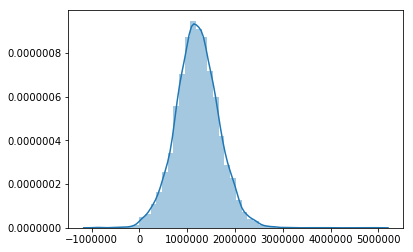

In [123]:
predictions_h = regressor_h.predict(x_train_h[numeric_column_names])

print(predictions_h[:8])

sns.distplot(predictions_h);

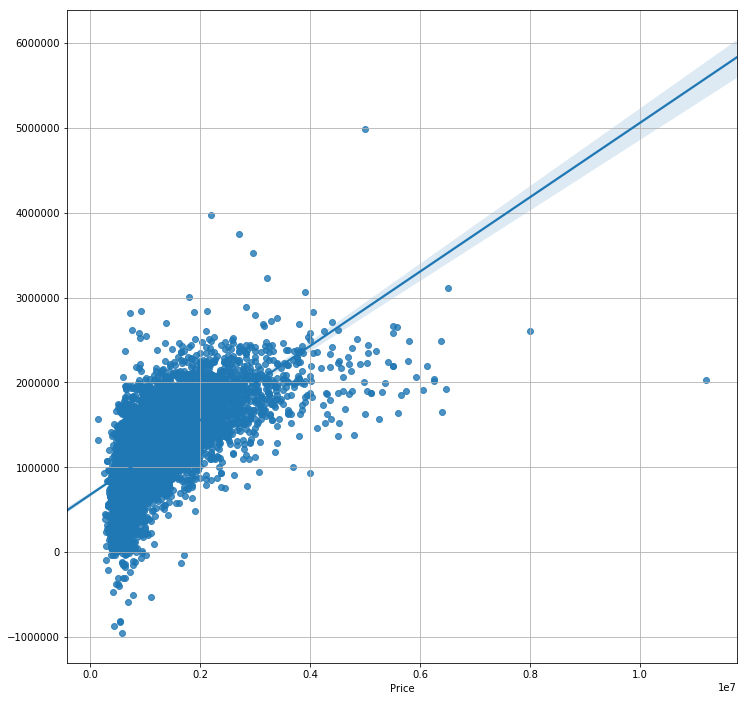

In [124]:
plt.figure(figsize=(12,12))
sns.regplot(y_train_h, predictions_h)
plt.grid(True)
plt.show()

In [125]:
train_data_h.shape

(15344, 21)

#### Да добавим още колони

In [126]:
categorical_columns = train_data.dtypes[full_data.dtypes == 'object'].index
print(categorical_columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [127]:
categorical_columns = categorical_columns.drop('Date').drop('Address')
categorical_columns

Index(['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname'], dtype='object')

In [128]:
x_test.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [129]:
from sklearn.preprocessing import LabelEncoder

train_data = train_data.fillna("")
x_train = x_train.fillna("XXX")
x_test = x_test.fillna("XXX")

In [130]:
def encode_categorical(data, columns):
    for col in columns:
        dummies = pd.get_dummies(data[col], prefix=col)
        data = pd.concat([data, dummies],axis=1)
        data.drop(col, axis=1, inplace=True)
    
    return data

x_train_encoded = encode_categorical(x_train.drop(['Date', 'Address'], axis=1), categorical_columns)
x_test_encoded = encode_categorical(x_test.drop(['Date', 'Address'], axis=1), categorical_columns)

common_cols = list(set(x_test_encoded.columns) & set(x_train_encoded.columns))
x_train_encoded = x_train_encoded[common_cols]
x_test_encoded = x_test_encoded[common_cols]

pd.options.display.max_columns=12
x_train_encoded.head(8)

,SellerG_Ash,CouncilArea_Macedon Ranges Shire Council,Suburb_Gladstone Park,Suburb_Ashburton,SellerG_Assisi,Suburb_Brooklyn,...,Suburb_Caulfield East,CouncilArea_Kingston City Council,Suburb_Preston,Suburb_East Melbourne,Suburb_Bonbeach,SellerG_Barlow
4811,0,0,0,0,0,0,...,0,0,0,0,0,0
8643,0,0,0,0,0,0,...,0,0,0,0,0,0
19211,0,0,0,0,0,0,...,0,0,0,0,0,0
7393,0,0,0,0,0,0,...,0,0,0,0,0,0
16796,0,0,0,0,0,0,...,0,0,0,0,0,0
13148,0,0,0,0,0,0,...,0,0,0,0,0,0
23085,0,0,0,0,0,0,...,0,0,0,0,0,0
18524,0,0,0,0,0,0,...,0,0,0,0,0,0


In [131]:
print(x_test_encoded.shape, y_test.shape, x_train_encoded.shape, y_train.shape)

(6855, 563) (6855,) (15995, 563) (15995,)


In [132]:
from sklearn.linear_model import LinearRegression 

cat_regression = LinearRegression().fit(x_train_encoded, y_train)
print(cat_regression.score(x_train_encoded, y_train))

print(cat_regression.score(x_test_encoded, y_test))

0.677872665493
-710278394850.0


![WAT.jpg](http://i0.kym-cdn.com/entries/icons/mobile/000/001/007/WAT.jpg)

In [135]:
x_test_encoded.describe()

,SellerG_Ash,CouncilArea_Macedon Ranges Shire Council,Suburb_Gladstone Park,Suburb_Ashburton,SellerG_Assisi,Suburb_Brooklyn,...,Suburb_Caulfield East,CouncilArea_Kingston City Council,Suburb_Preston,Suburb_East Melbourne,Suburb_Bonbeach,SellerG_Barlow
count,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,...,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000,6855.000000
mean,0.000146,0.002042,0.001313,0.005835,0.000146,0.001167,...,0.000729,0.024508,0.015171,0.000875,0.000146,0.001751
std,0.012078,0.045149,0.036213,0.076171,0.012078,0.034144,...,0.026999,0.154630,0.122243,0.029574,0.012078,0.041806
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
x_train_encoded.Suburb_Ashburton.value_counts()

0    15934
1       61
Name: Suburb_Ashburton, dtype: int64

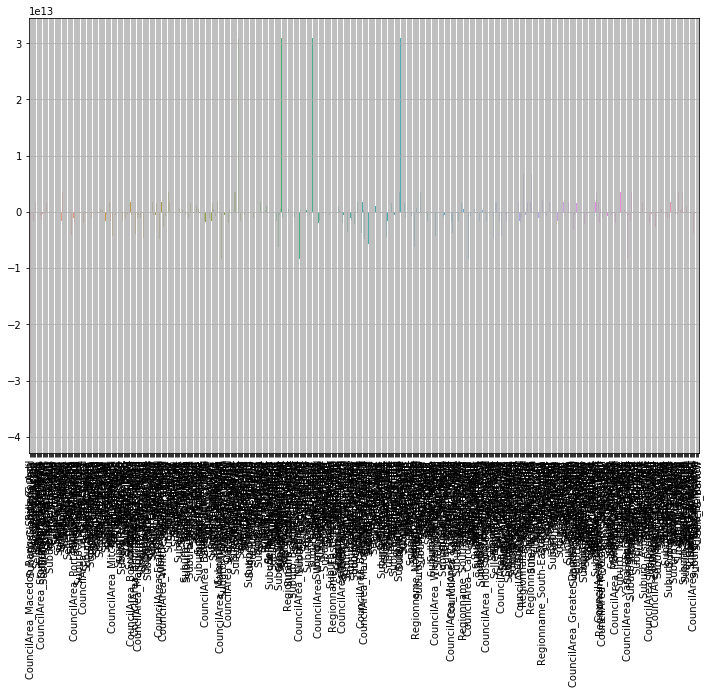

In [139]:
plt.figure(figsize=(12,8))
barplot = sns.barplot(x=common_cols, y=cat_regression.coef_, orient='vertical')
plt.setp(barplot.get_xticklabels(), rotation=90); plt.grid(True);

![out.jpg](http://picsmine.com/wp-content/uploads/2017/01/Meme-Shits-Gone-Too-Far-I-Am-Out-Photo.jpg)